In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv")



In [ ]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.duplicated().sum()

18078

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(df)
print(df.columns)

Index(['heart_disease', 'bmi', 'smoking', 'alcohol_drinking', 'stroke',
       'physical_health', 'mental_health', 'diff_walking', 'sex',
       'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')


In [ ]:
df.describe().style.set_properties(**{"background-color": "crimson","color":"darkgreen","border":"3px solid black"})

,bmi,physical_health,mental_health,sleep_time
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
for column in df.columns:
  print(f"{column}:===={len(df[column].unique())}")

heart_disease:====2
bmi:====3604
smoking:====2
alcohol_drinking:====2
stroke:====2
physical_health:====31
mental_health:====31
diff_walking:====2
sex:====2
age_category:====13
race:====6
diabetic:====4
physical_activity:====2
gen_health:====5
sleep_time:====24
asthma:====2
kidney_disease:====2
skin_cancer:====2


In [ ]:
num_col=df.select_dtypes(include=["number"]).columns.tolist()
cat_col=df.select_dtypes(include=["object","category"]).columns.tolist()
print("Numerical columns:",num_col)
print("Categorical columns:",cat_col)

Numerical columns: ['bmi', 'physical_health', 'mental_health', 'sleep_time']
Categorical columns: ['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']


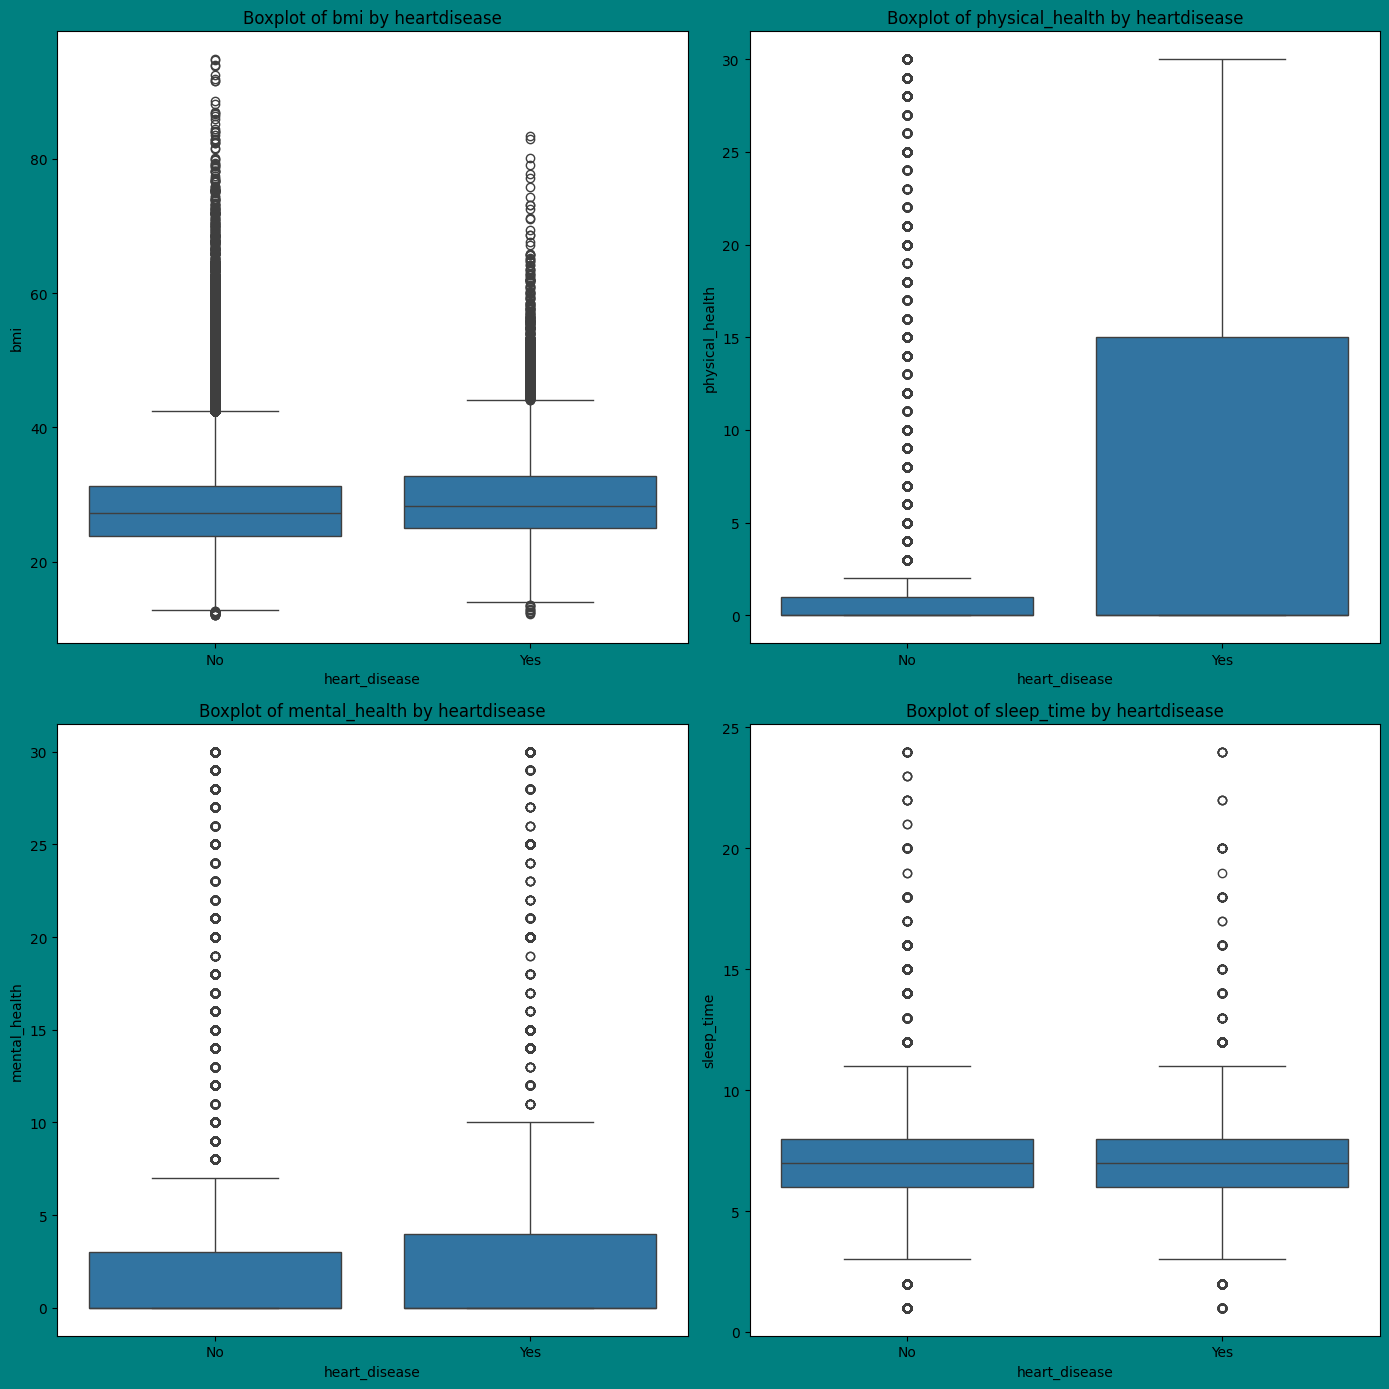

In [ ]:
num_cols=['bmi','physical_health','mental_health','sleep_time']
plt.figure(figsize=(14,14), facecolor='teal')
for i,col in enumerate(num_cols):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=df,x="heart_disease",y=col)
  plt.title(f'Boxplot of {col} by heartdisease')
plt.tight_layout()
plt.show()

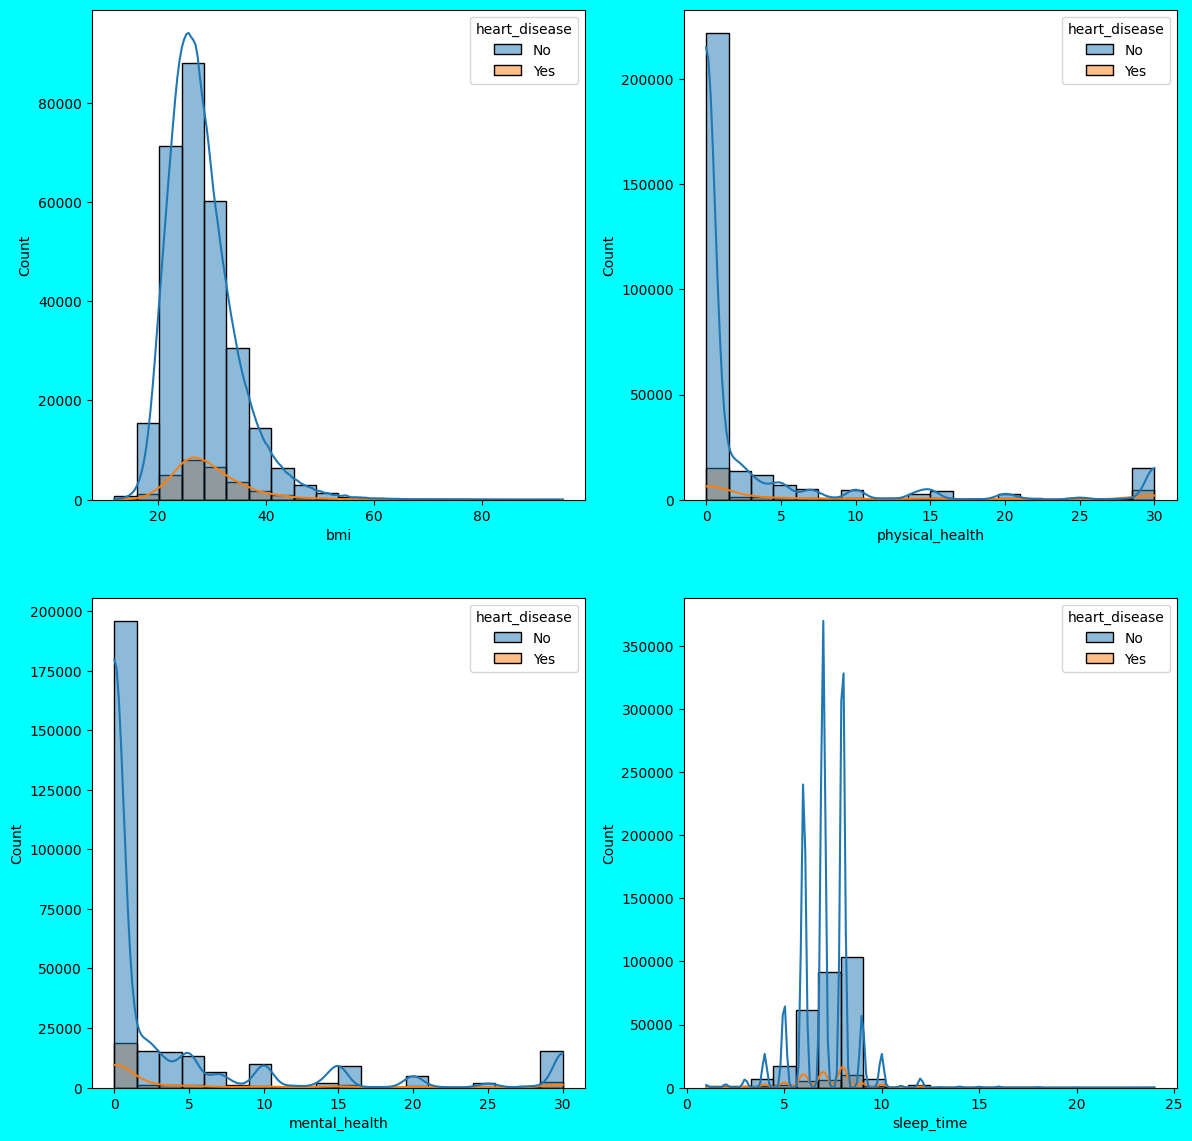

In [ ]:
num_cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']
plt.figure(figsize=(14, 14),facecolor="aqua")
for i,col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins =20,hue="heart_disease")
plt.show()

<ipython-input-4-b0ab3db1e98c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["age_category"], palette="Spectral")


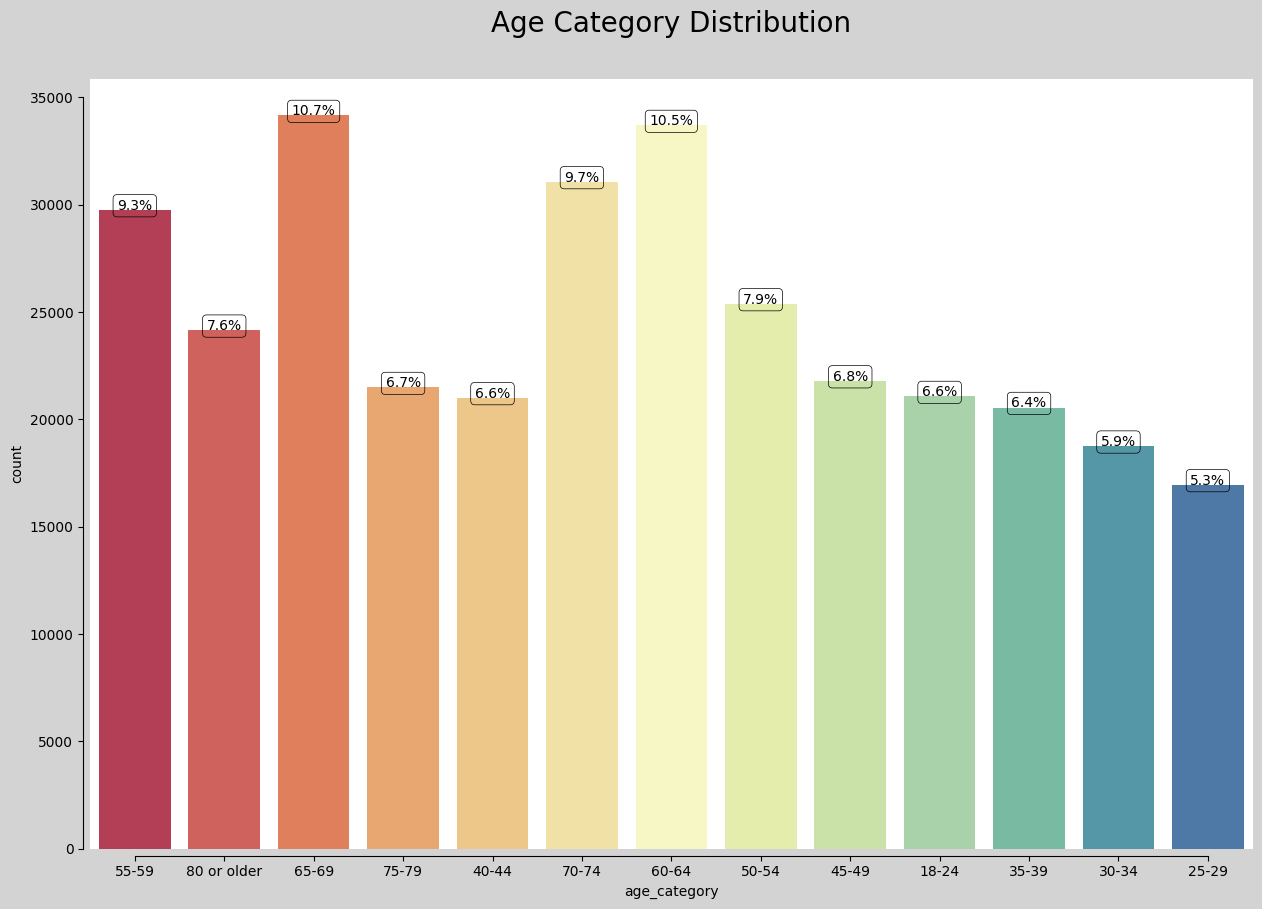

In [ ]:
plt.figure(figsize=(15,10), facecolor='lightgrey')
total = float(len(df))
ax = sns.countplot(x=df["age_category"], palette="Spectral")


for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width()/2., height + 3, "{:1.1f}%".format((height/total)*100), ha="center", bbox=dict(facecolor="none",
                                                            edgecolor="black", boxstyle="round", linewidth=0.5))

ax.set_title('Age Category Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

<ipython-input-5-e71ed3c10b0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["race"], palette="RdGy")


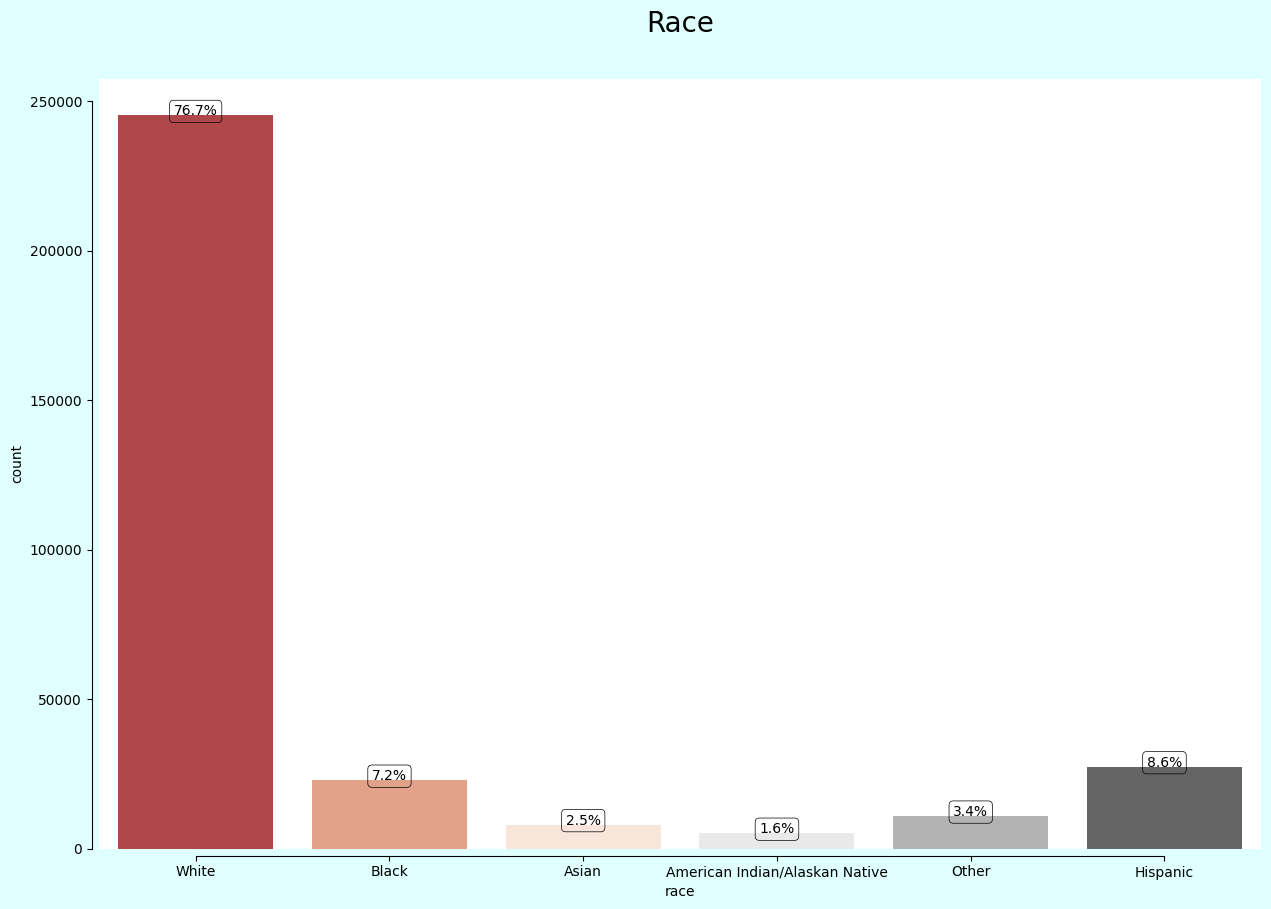

In [ ]:
plt.figure(figsize=(15,10), facecolor='lightcyan')
total = float(len(df))
ax = sns.countplot(x=df["race"], palette="RdGy")


for x in ax.patches:
    height = x.get_height()
    ax.text(x.get_x() + x.get_width()/2., height + 3, "{:1.1f}%".format((height/total)*100), ha="center", bbox=dict(facecolor="none",
                                                            edgecolor="black", boxstyle="round", linewidth=0.5))

ax.set_title('Race', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

In [ ]:
df["diabetic"].value_counts()


diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

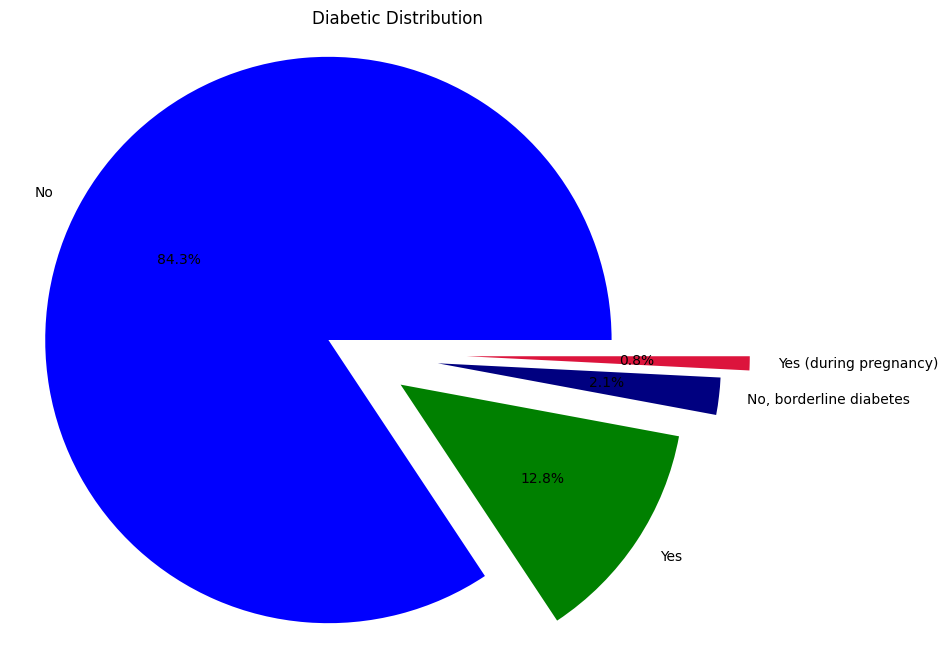

In [ ]:
diabetic_counts = df["diabetic"].value_counts()
my_explode=[0.1,0.2,0.3,0.4]
plt.figure(figsize=(10, 8))
plt.pie(diabetic_counts, labels=diabetic_counts.index, autopct='%1.1f%%',explode=my_explode, colors=['blue', 'green',"navy","crimson"])
plt.title('Diabetic Distribution')
plt.axis("equal")
plt.show()

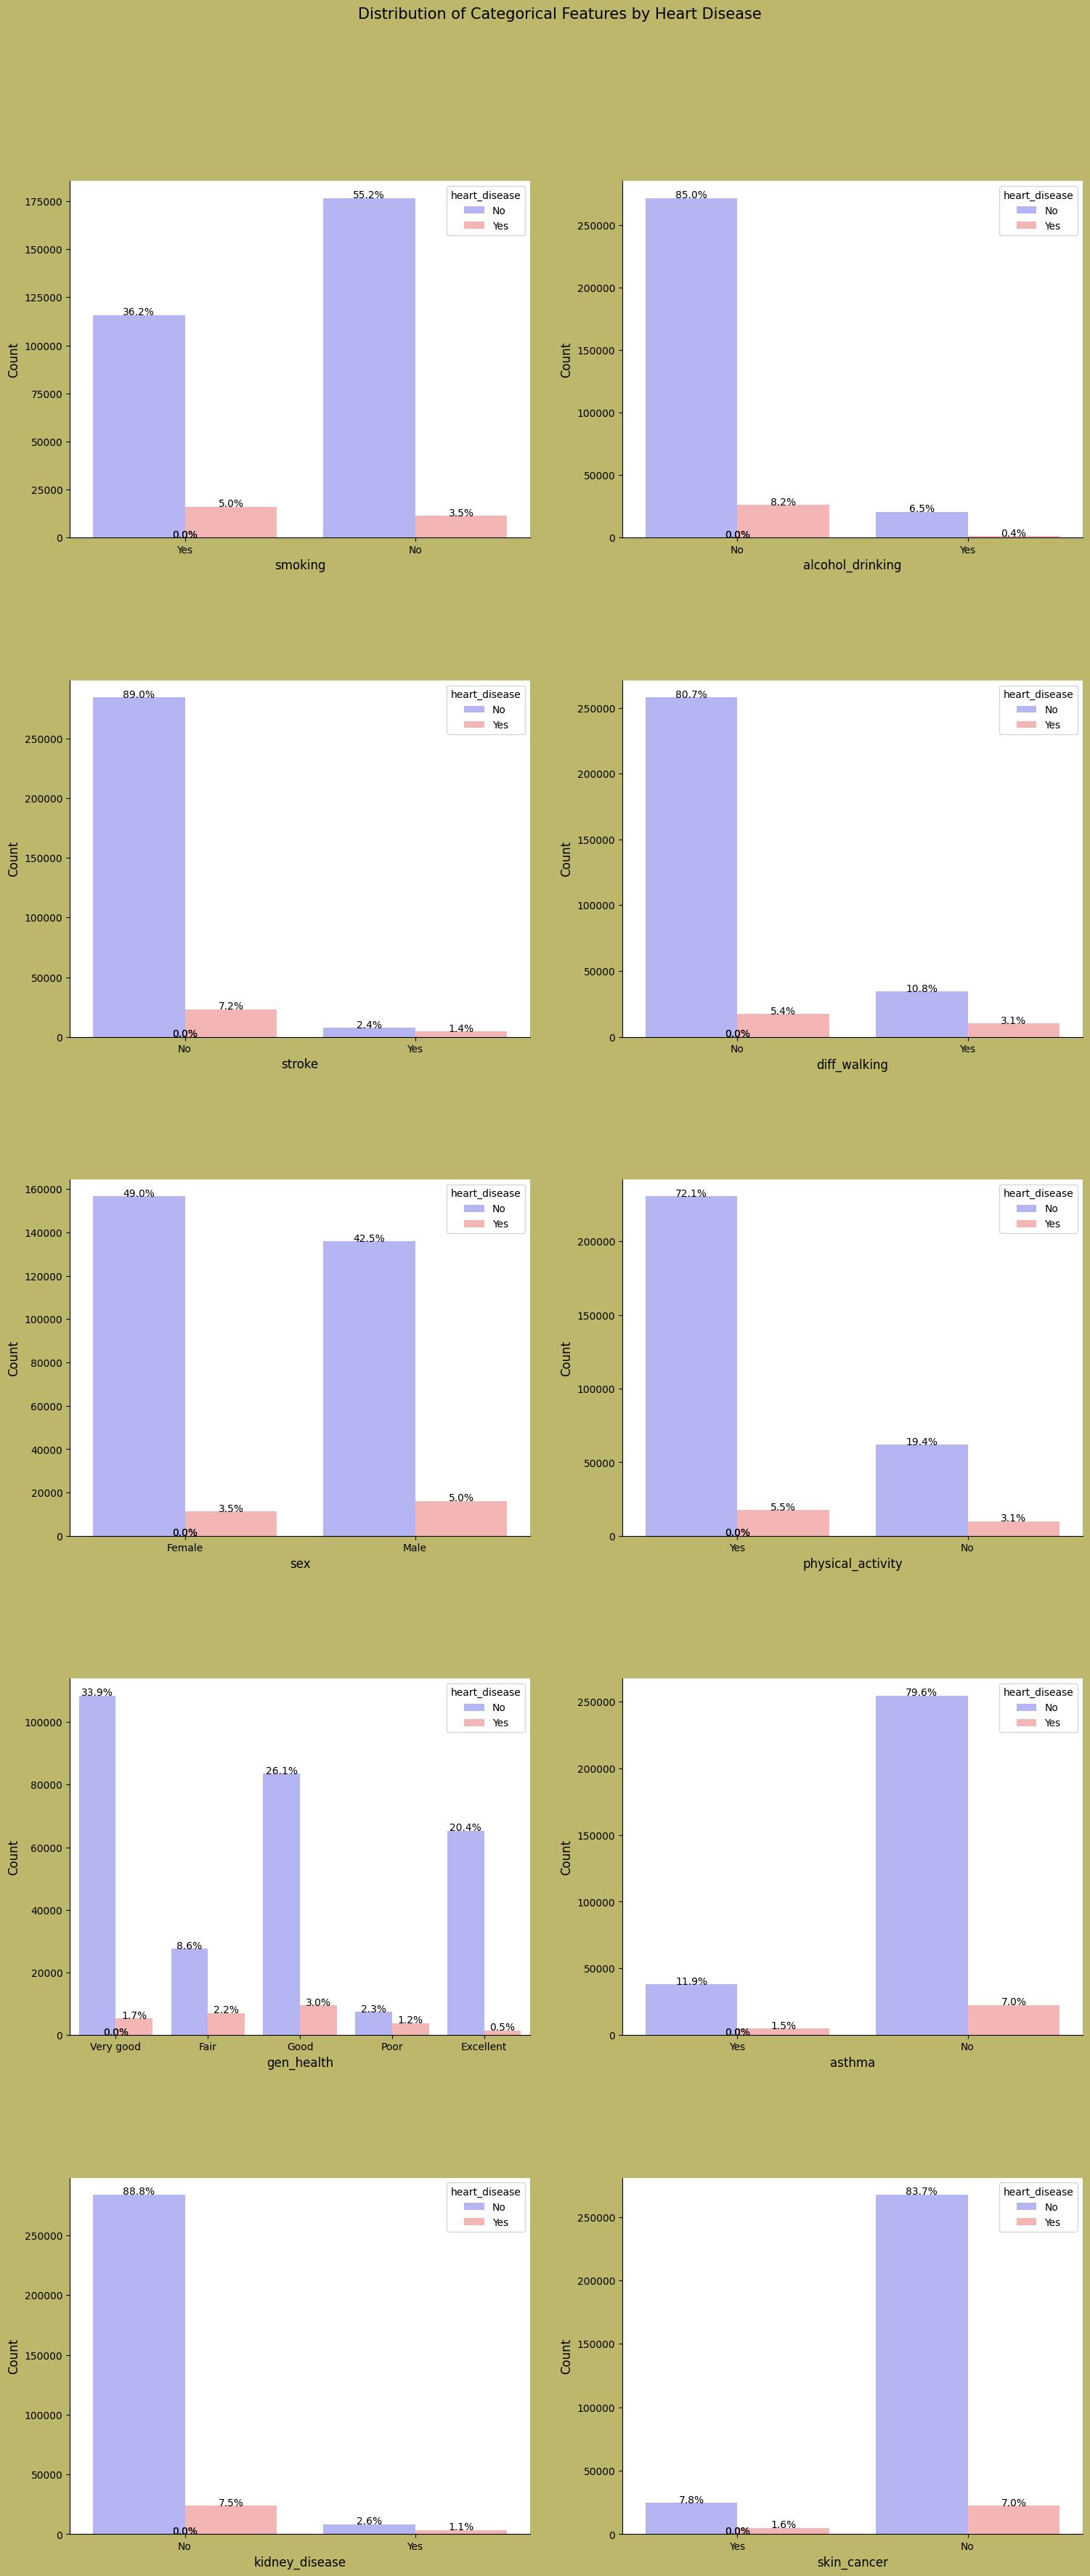

In [ ]:
cat_feature = ['smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']

L = len(cat_feature)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), facecolor='darkkhaki')
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)

for i, col in enumerate(cat_feature):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=df, x=col, hue="heart_disease", palette="bwr", ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()

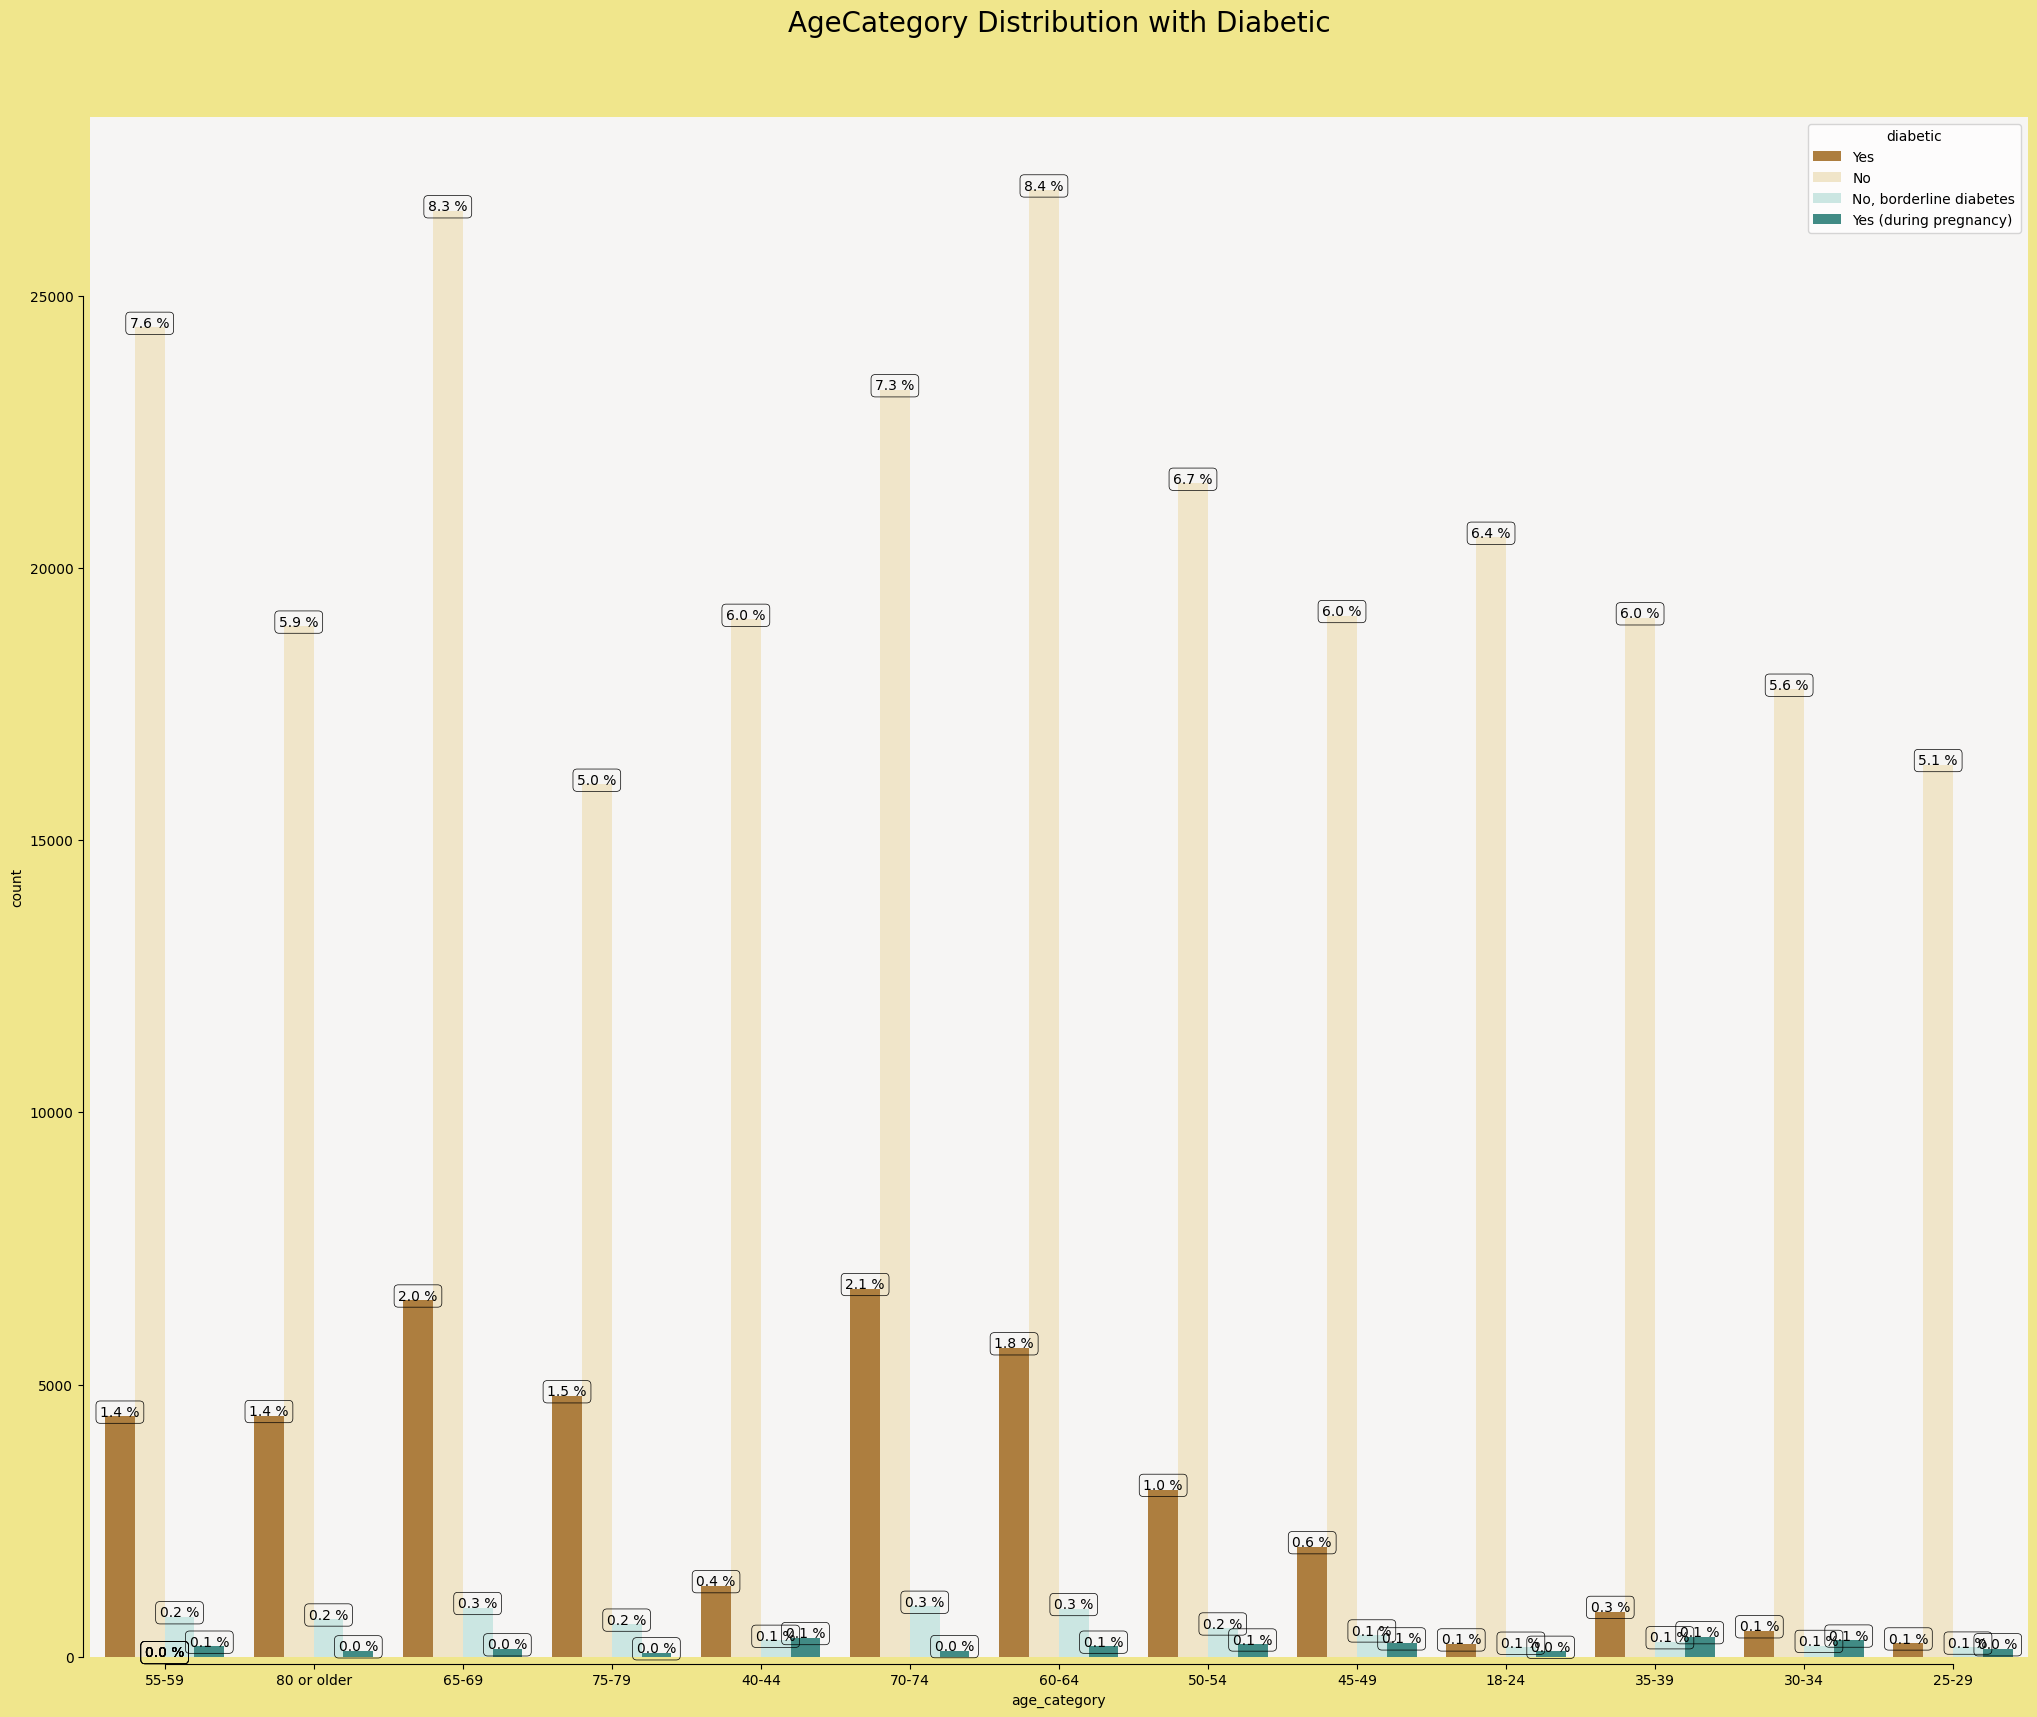

In [ ]:
plt.figure(figsize=(25,20), facecolor='khaki')
total = float(len(df))

ax = sns.countplot(x='age_category', hue='diabetic', data=df, palette="BrBG")
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution with Diabetic', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


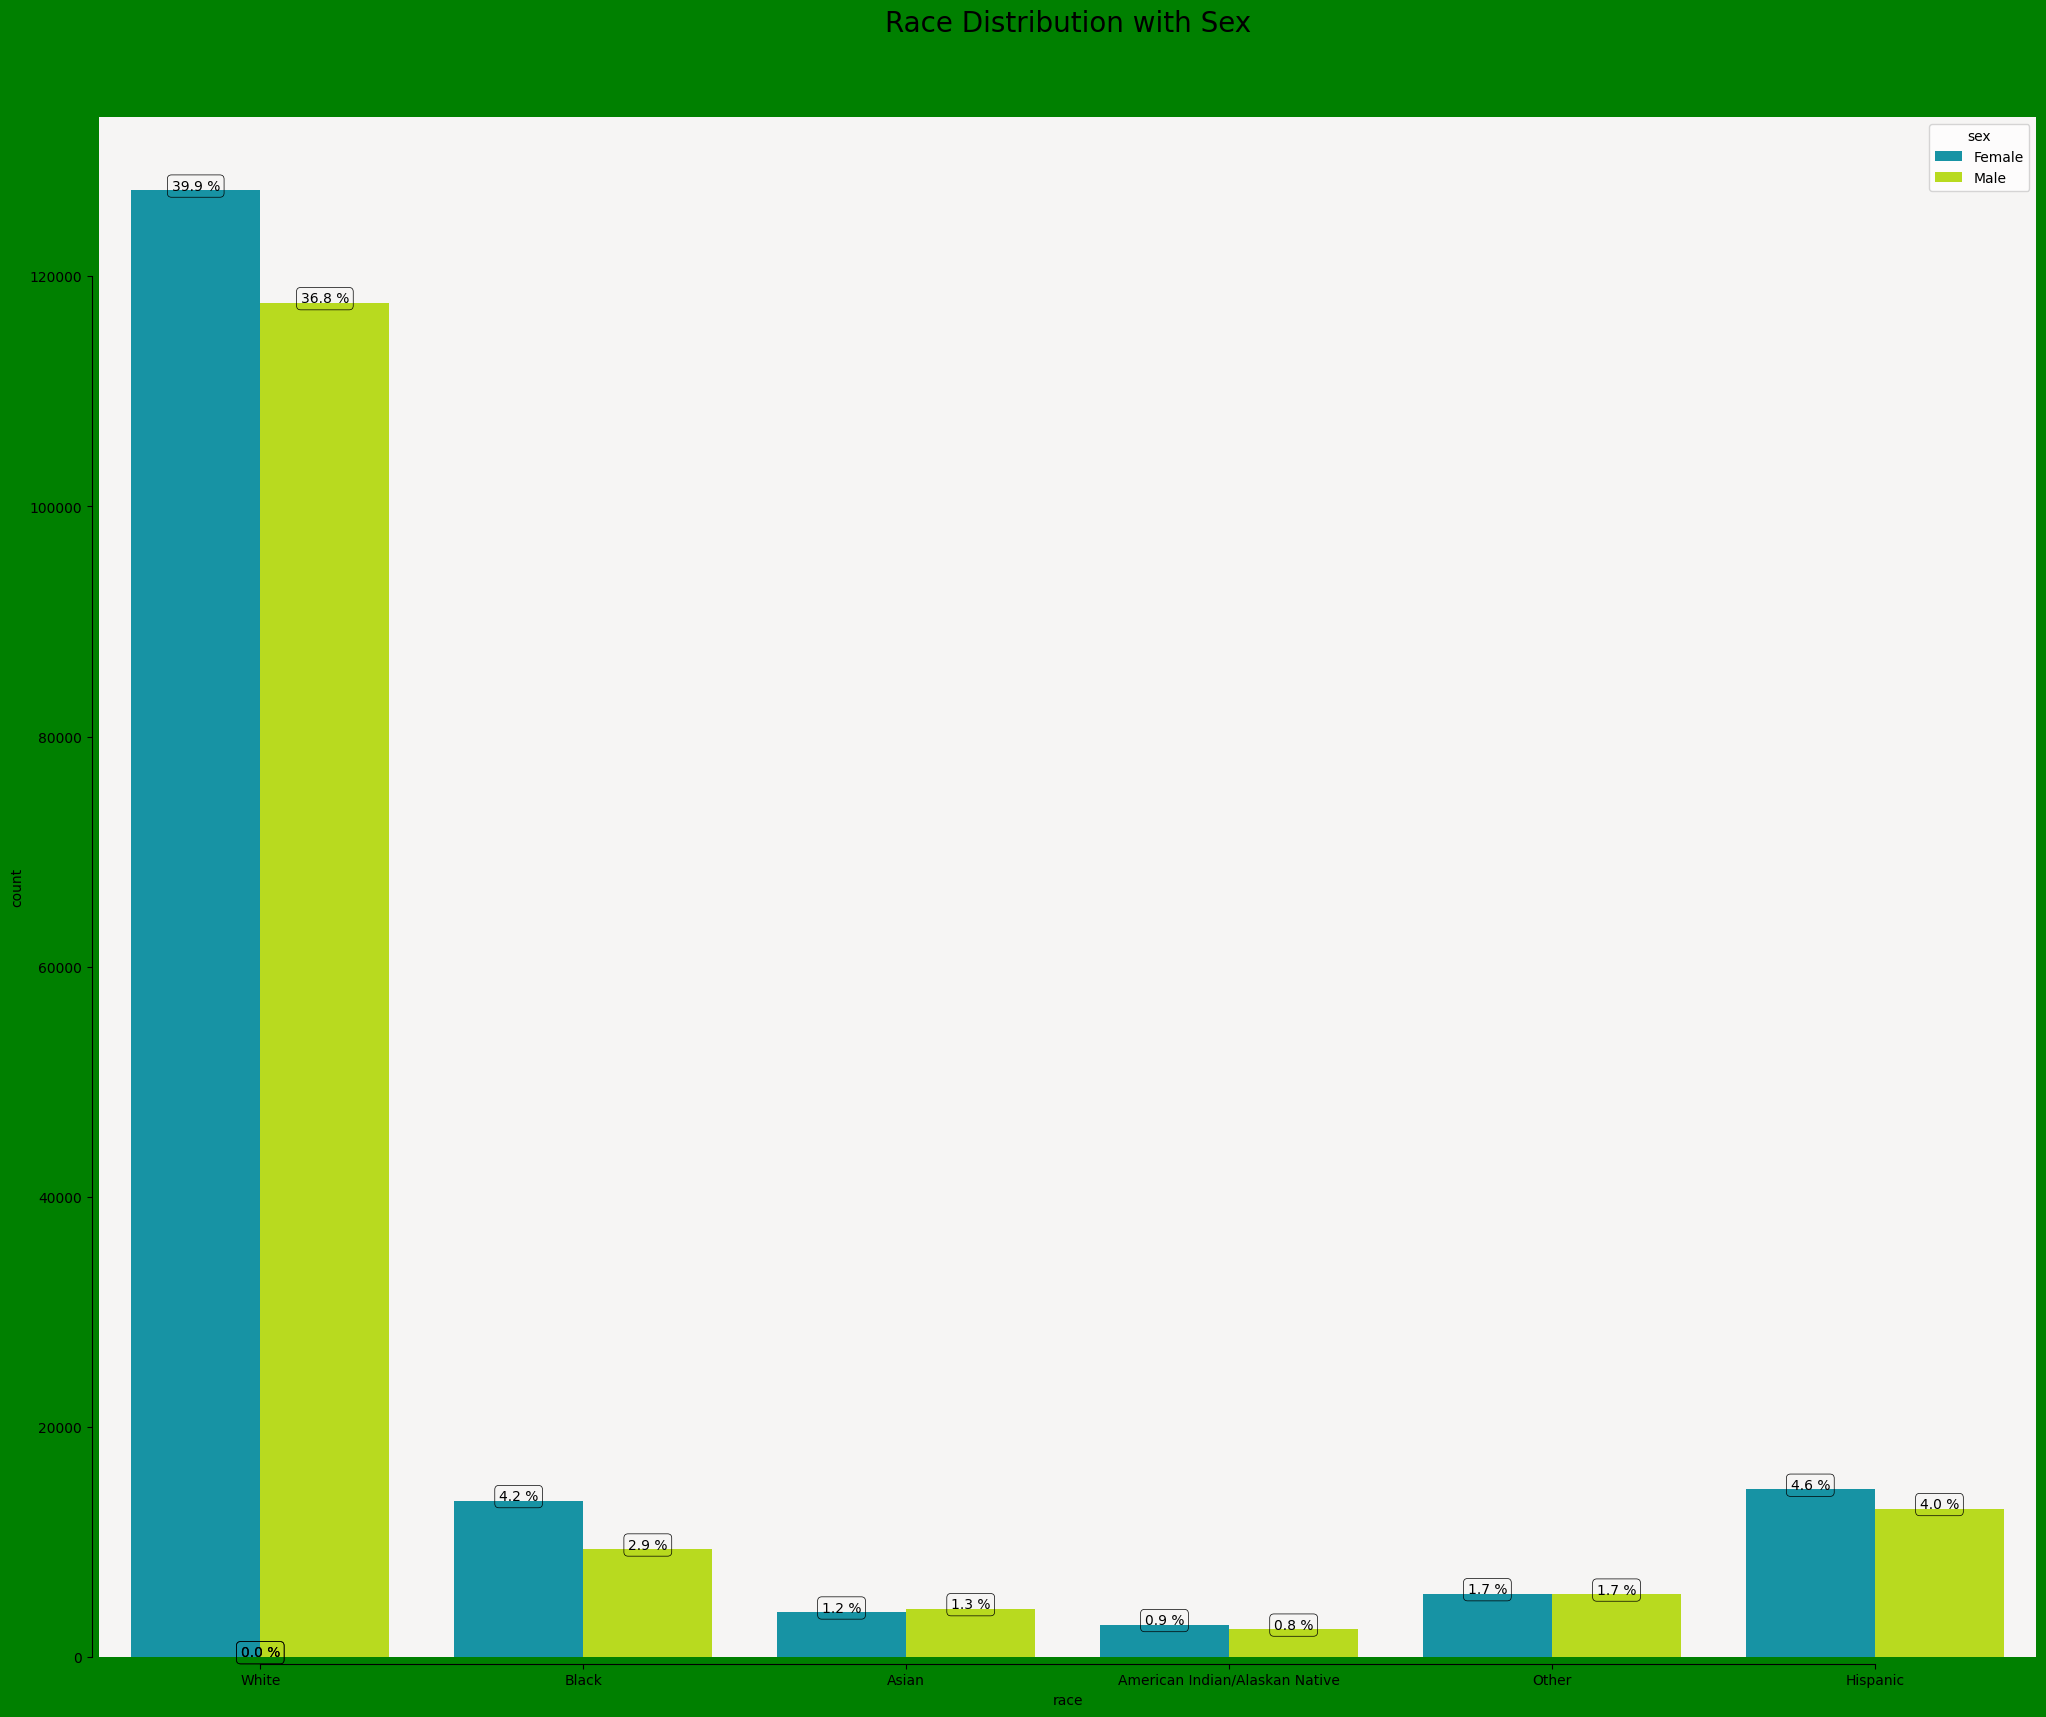

In [ ]:
plt.figure(figsize=(25,20), facecolor='green')
total = float(len(df))

ax = sns.countplot(x='race', hue='sex', data=df, palette="nipy_spectral")
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with Sex', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

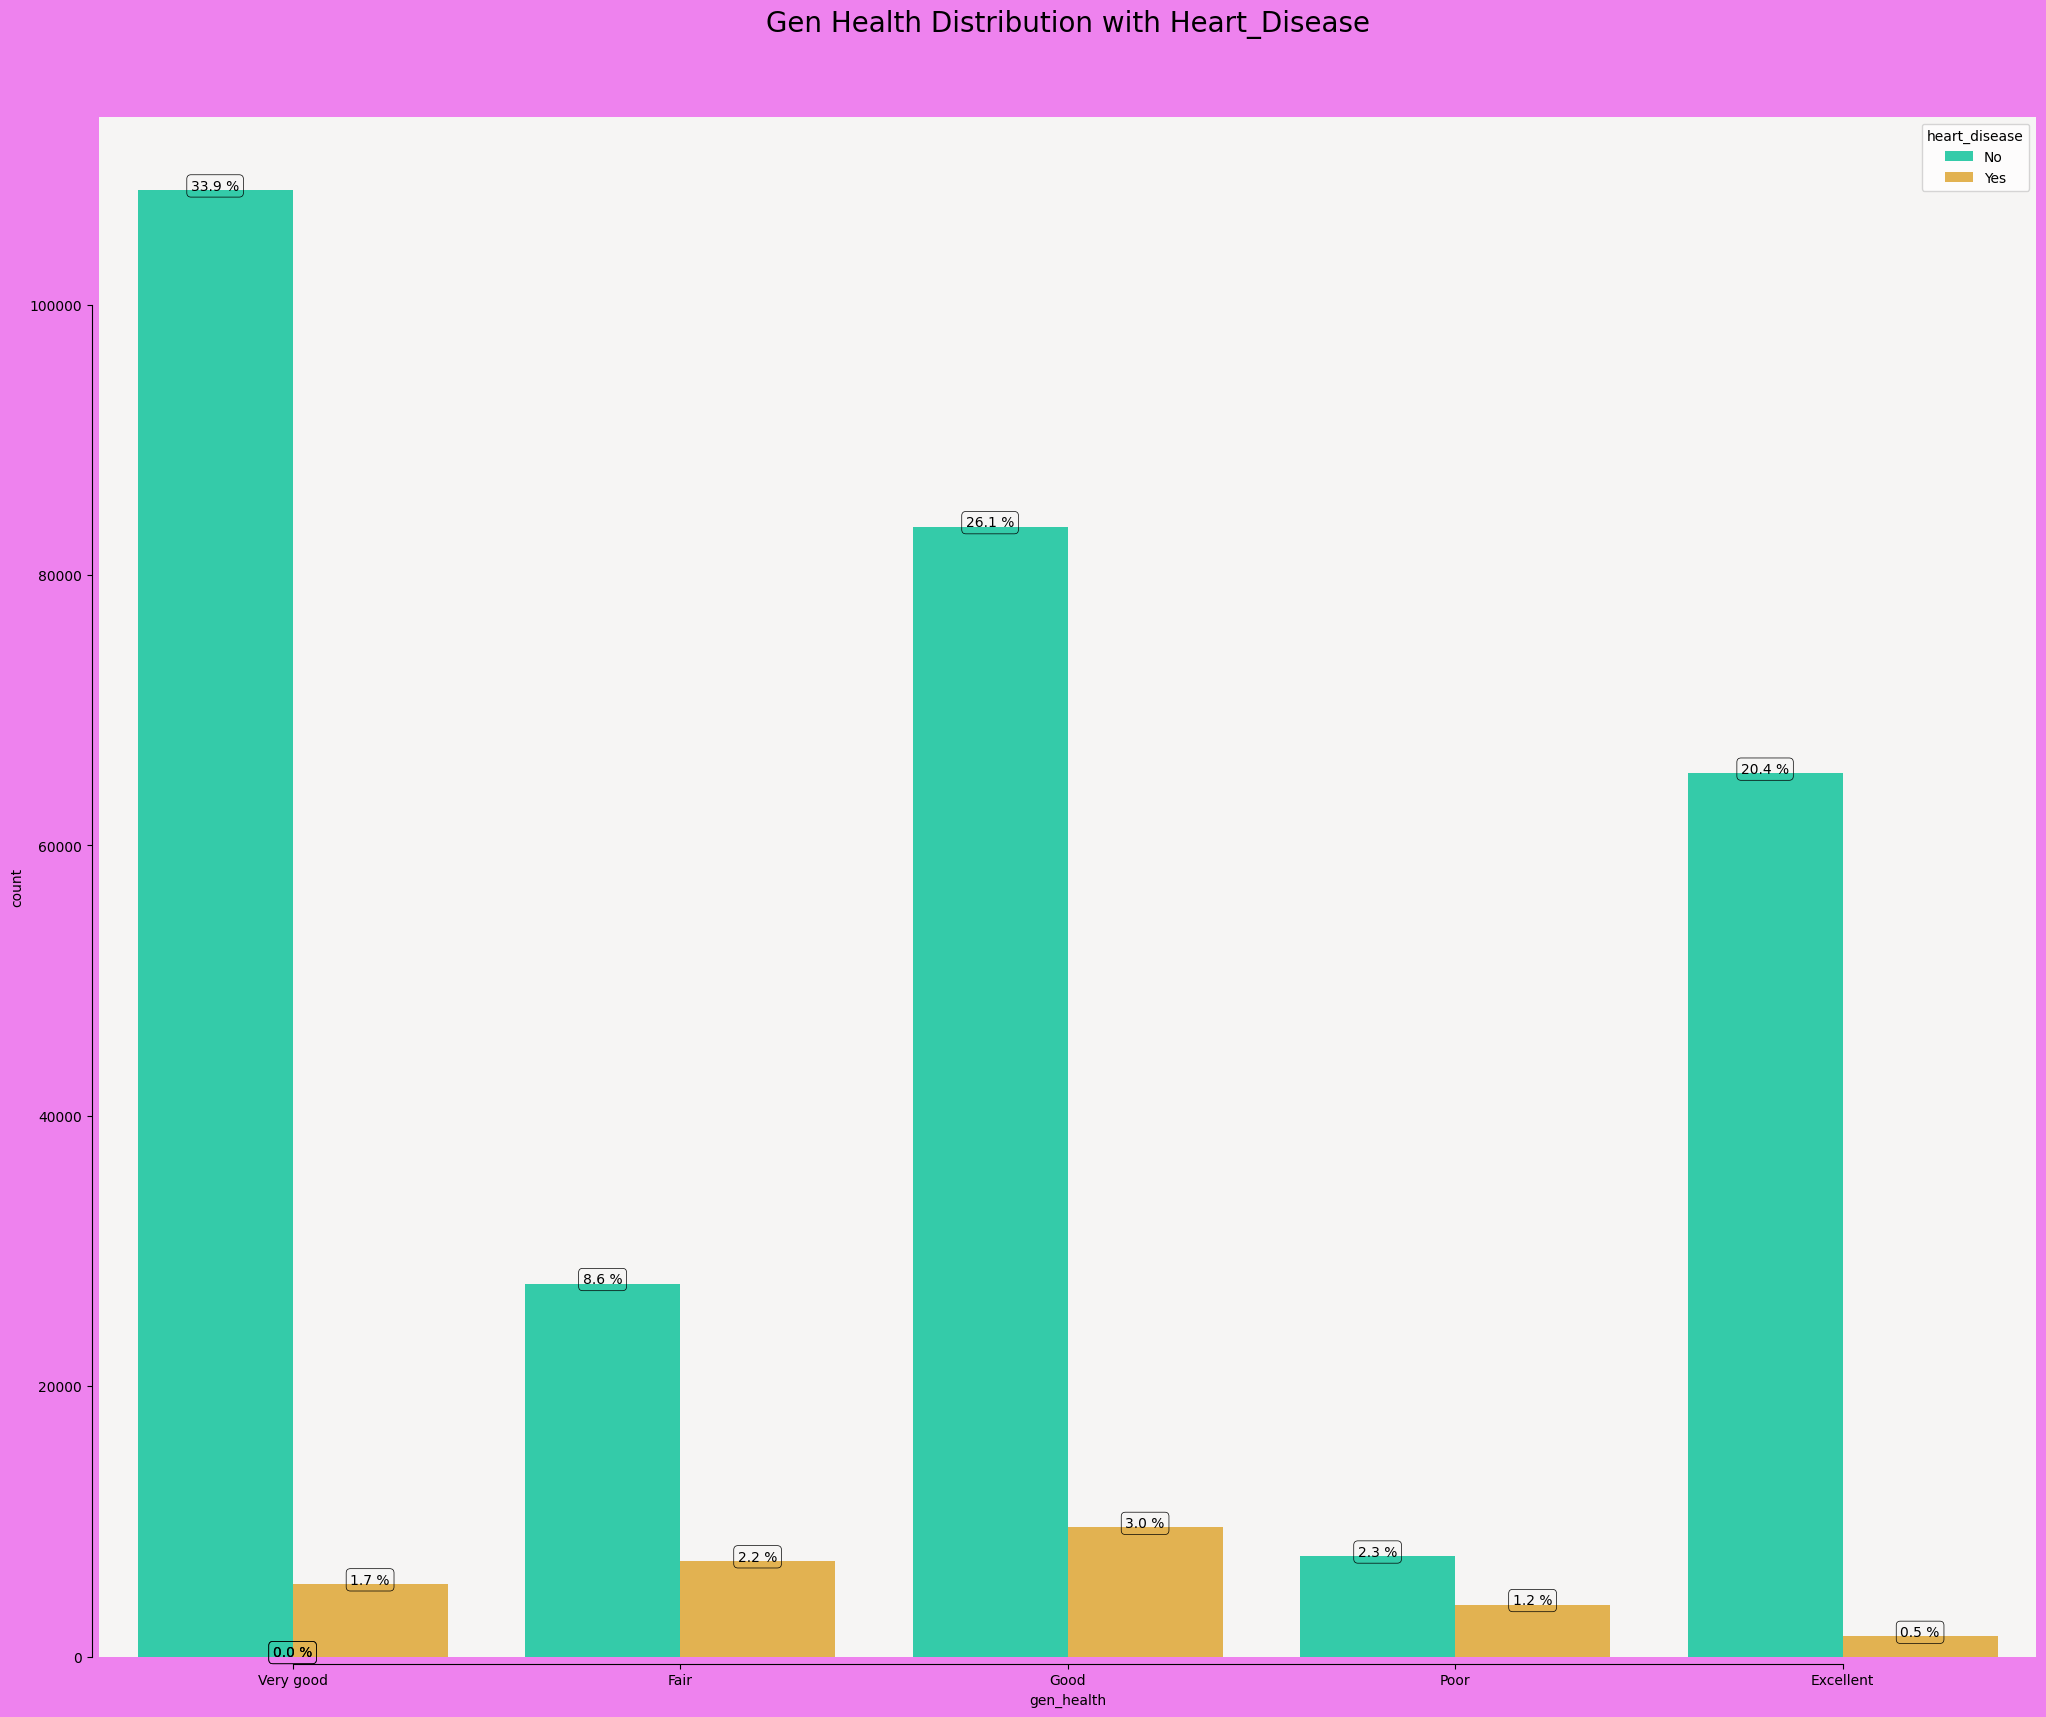

In [ ]:
plt.figure(figsize=(25,20), facecolor='violet')
total = float(len(df))

ax = sns.countplot(x='gen_health', hue='heart_disease', data=df, palette="turbo")
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Gen Health Distribution with Heart_Disease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

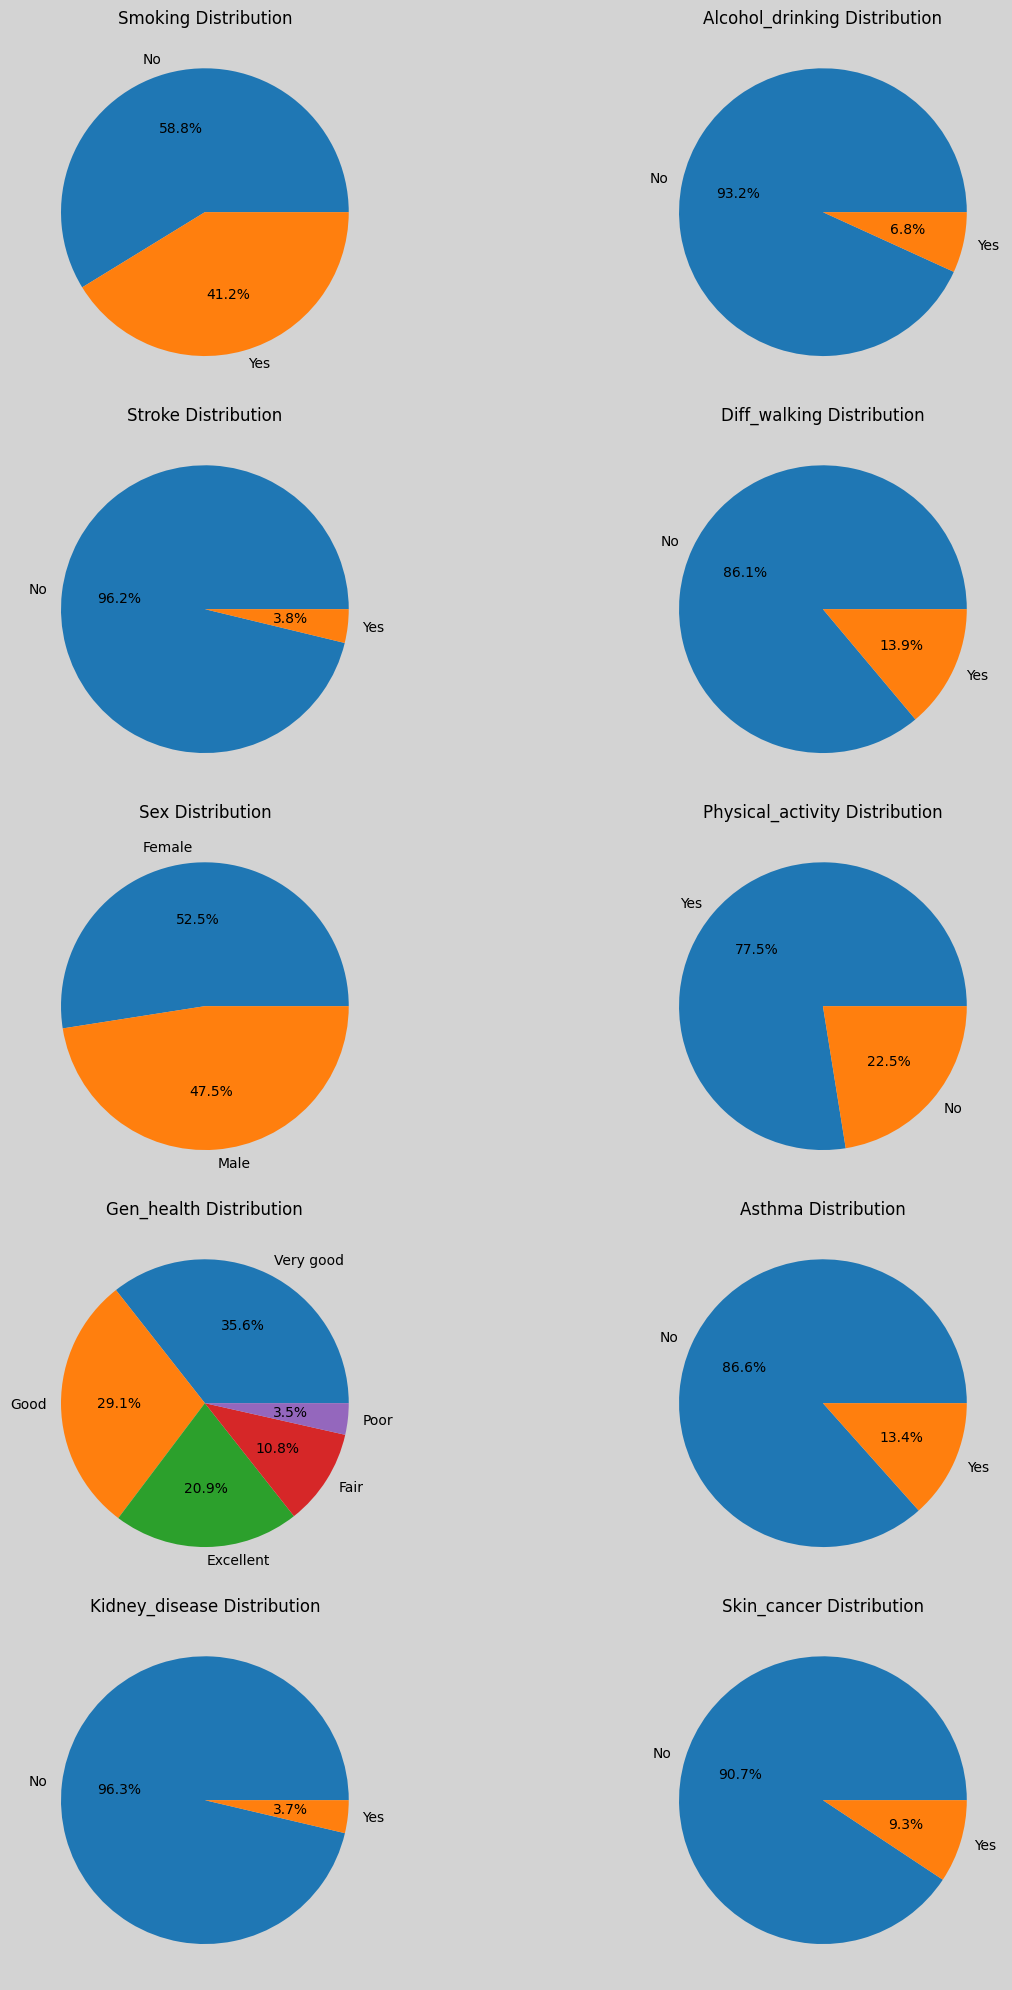

In [ ]:
cat_features = ['smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']

# Calculate total number of rows and columns for subplots
num_rows = 5
num_cols = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20), facecolor="lightgrey")

# Flatten the axes array to iterate over them
axs = axs.flatten()

# Iterate through each categorical feature
for i, feature in enumerate(cat_features):
    # Get value counts for the current feature
    feature_counts = df[feature].value_counts()

    # Create a pie chart for the current feature
    axs[i].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%')
    axs[i].set_title(feature.capitalize() + " Distribution")

# Hide any unused subplots
for j in range(len(cat_features), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

<ipython-input-13-7c28ce5b4dc1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="age_category",data=df,palette="Set1")


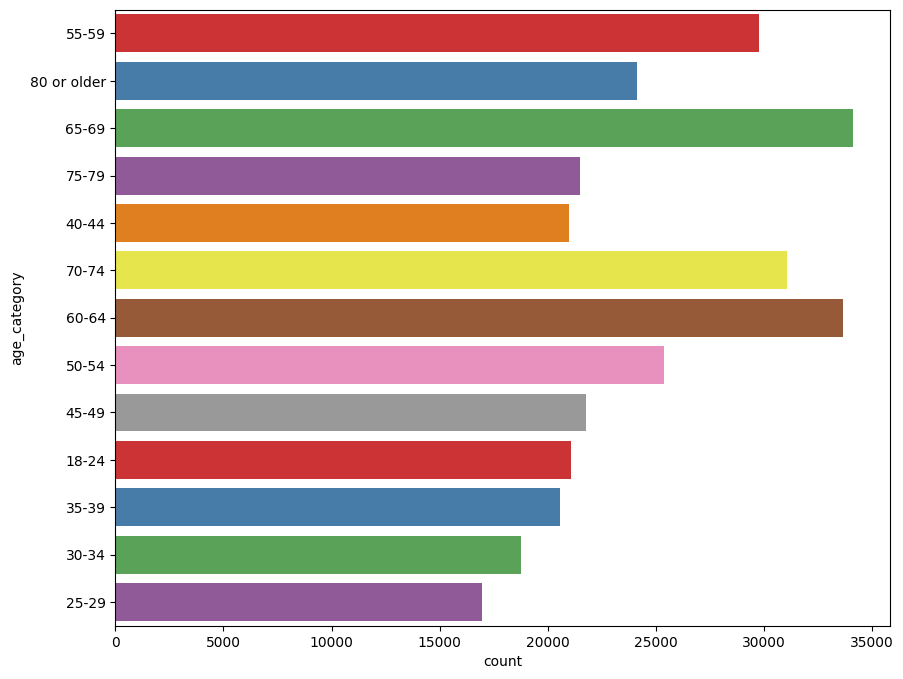

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_category",data=df,palette="Set1")
plt.show()

<ipython-input-14-55a62fd00c4e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axs[i], palette="rainbow")
<ipython-input-14-55a62fd00c4e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axs[i], palette="rainbow")
<ipython-input-14-55a62fd00c4e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axs[i], palette="rainbow")
<ipython-input-14-55a62fd00c4e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

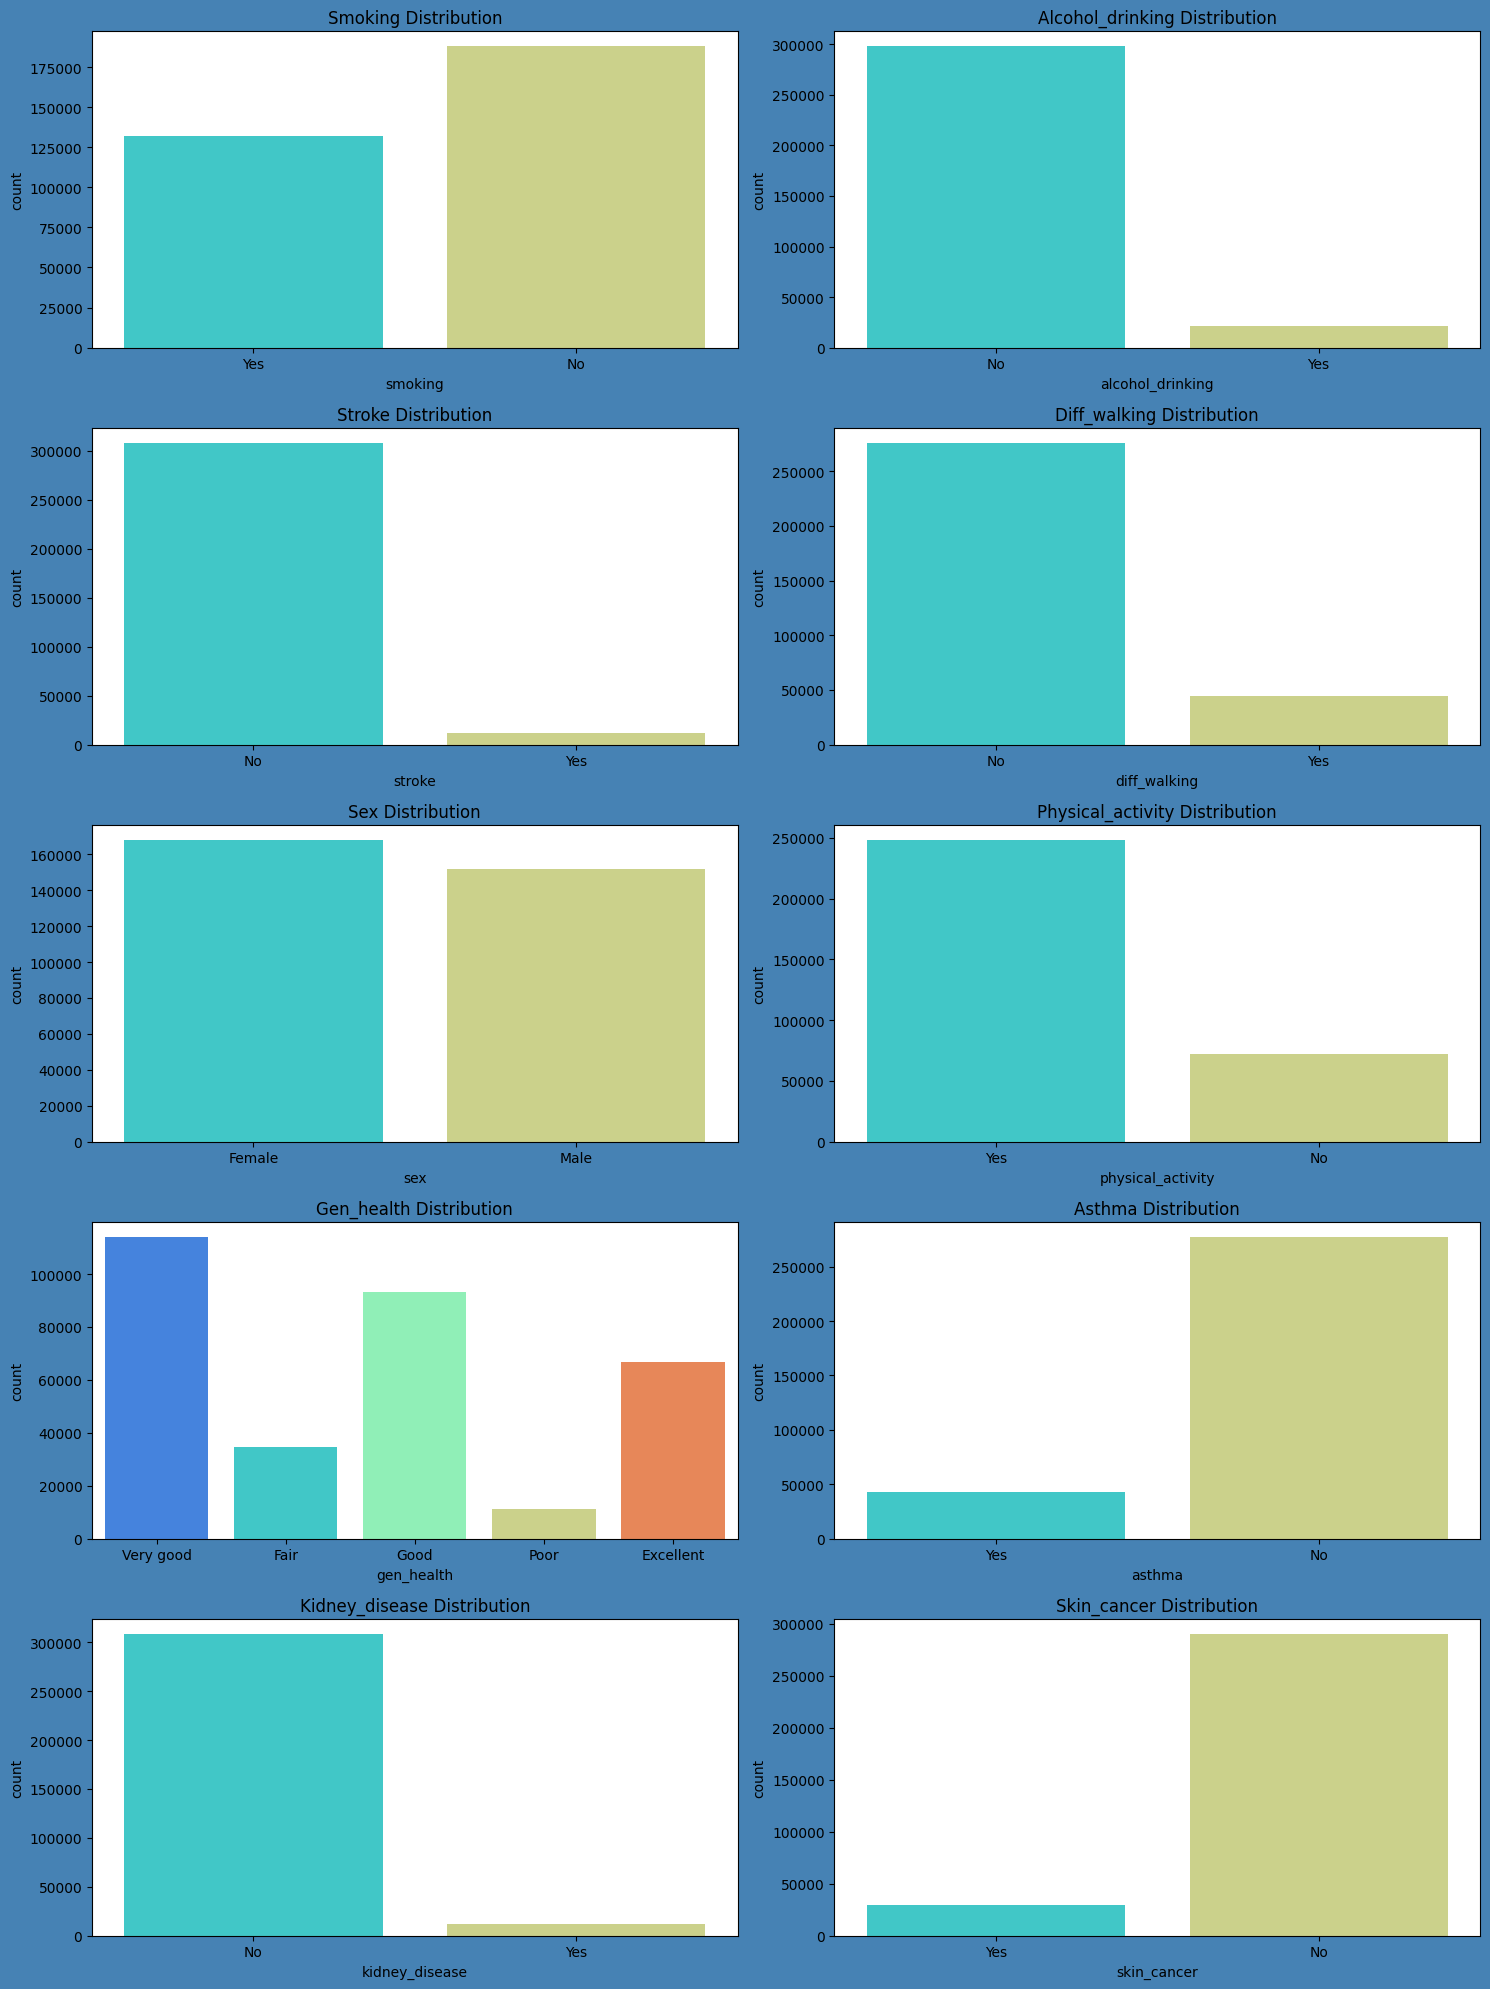

In [ ]:
cat_features = ['smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']

# Calculate total number of rows and columns for subplots
num_rows = 5
num_cols = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20), facecolor="steelblue")

# Flatten the axes array to iterate over them
axs = axs.flatten()

# Iterate through each categorical feature
for i, feature in enumerate(cat_features):
    # Create a countplot for the current feature
    sns.countplot(data=df, x=feature, ax=axs[i], palette="rainbow")
    axs[i].set_title(feature.capitalize() + " Distribution")

# Hide any unused subplots
for j in range(len(cat_features), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df['heart_disease'] = df['heart_disease'].replace({'Yes': 1, 'No': 0})
df['kidney_disease'] = df['kidney_disease'].replace({'Yes': 1, 'No': 0})
df['skin_cancer'] = df['skin_cancer'].replace({'Yes': 1, 'No': 0})
df['smoking'] = df['smoking'].replace({'Yes': 1, 'No': 0})
df['asthma'] = df['asthma'].replace({'Yes': 1, 'No': 0})
df['alcohol_drinking'] = df['alcohol_drinking'].replace({'Yes': 1, 'No': 0})
df['stroke'] = df['stroke'].replace({'Yes': 1, 'No': 0})
df['physical_activity'] = df['physical_activity'].replace({'Yes': 1, 'No': 0})
df['diff_walking'] = df["diff_walking"].replace({'Yes': 1, 'No': 0})
df['sex'] = df["sex"].replace({'Male': 1, 'Female': 0})
df["age_category"]=df["age_category"].replace({ '18-24': 0,'25-29': 1,'30-34': 2,'35-39': 3,
                                                                                    '40-44': 4,
                                                                                    '45-49': 5,
                                                                                    '50-54': 6,
                                                                                    '55-59': 7,
                                                                                    '60-64': 8,
                                                                                    '65-69': 9,
                                                                                    '70-74': 10,
                                                                                    '75-79': 11,
                                                                                    '80 or older': 12})

df["race"]=df["race"].replace({"White":0,"Hispanic":1,"Black":3,"Asian":4,"American Indian/Alaskan Native":5,"Other":6})
df["gen_health"]=df["gen_health"].replace({"Very good":0,"Good":1,"Excellent":3,"Fair":4,"Poor":5})
df['diabetic'] = df['diabetic'].replace({'Yes': 1, 'No': 0,"No, borderline diabetes":0,"Yes (during pregnancy)":1})

In [ ]:
df.head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,1,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,1,1,4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,1,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,0,8.0,0,0,0


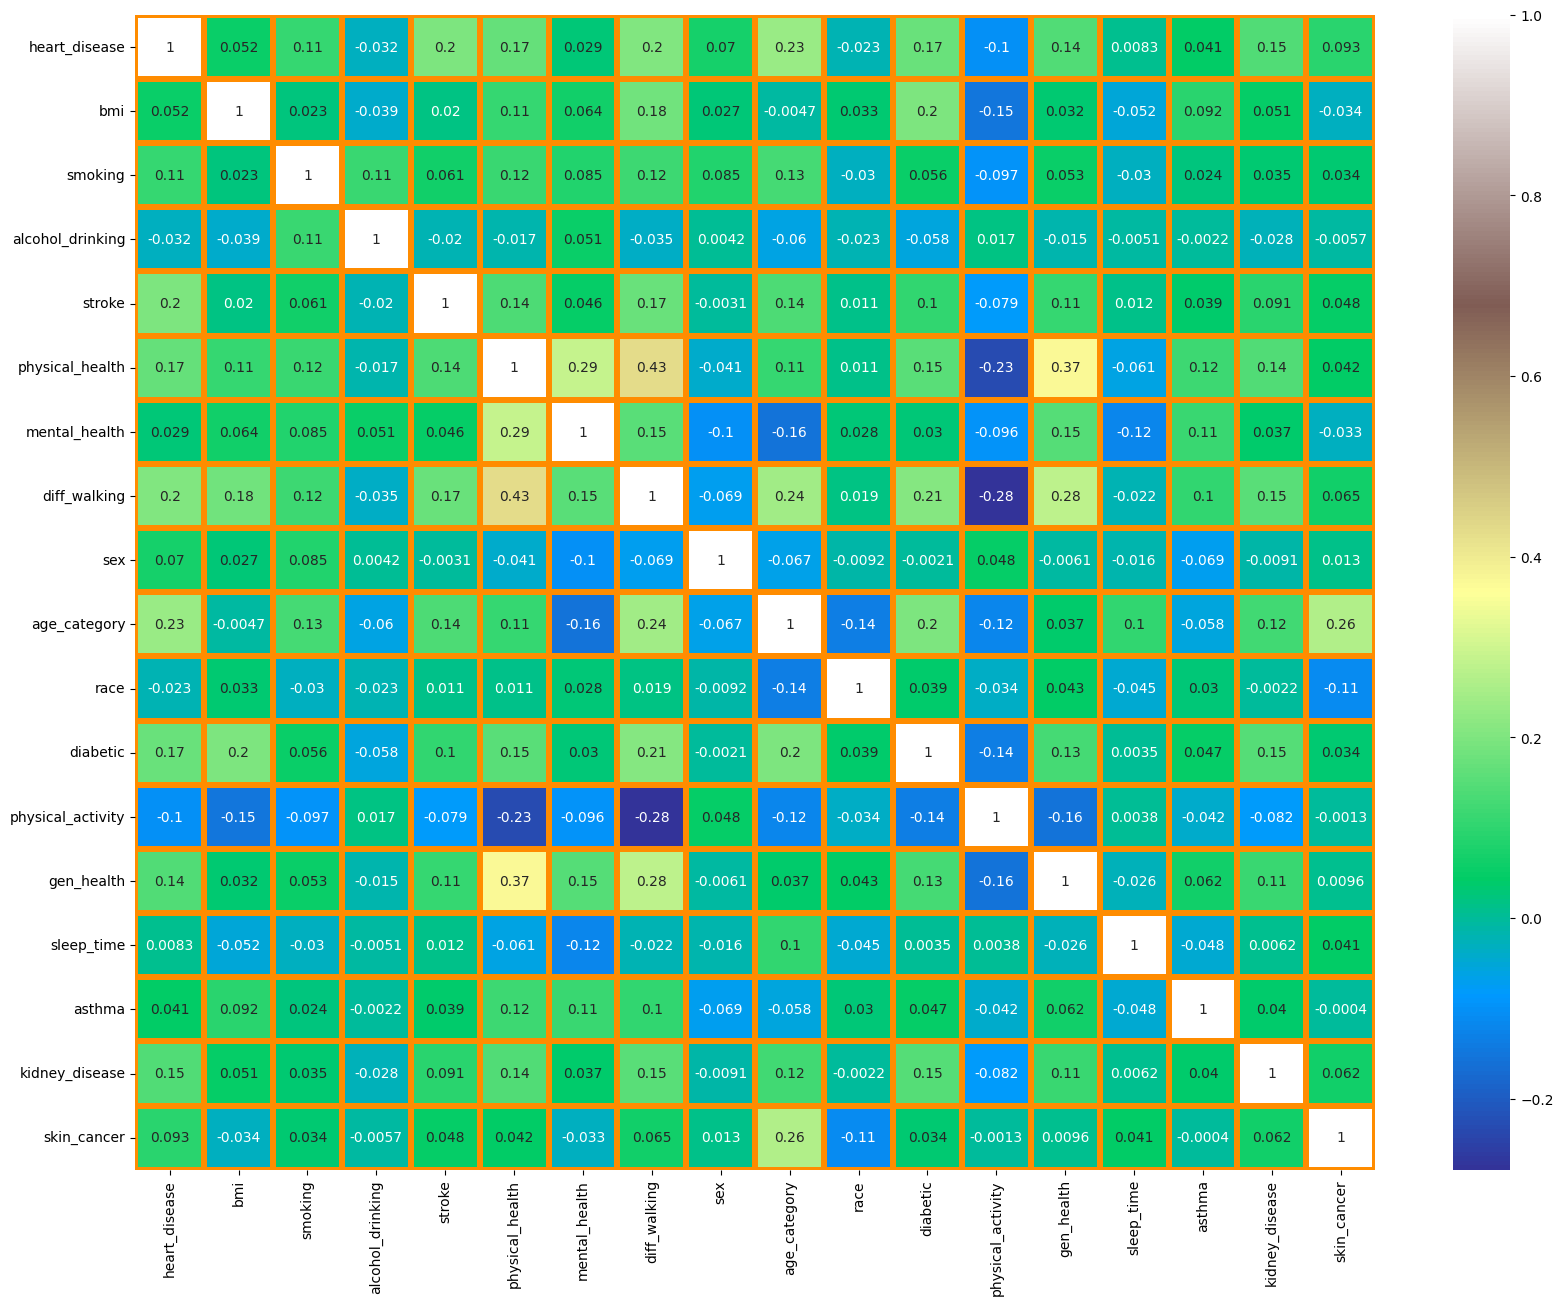

In [ ]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=4,linecolor="darkorange",cmap="terrain")
plt.show()

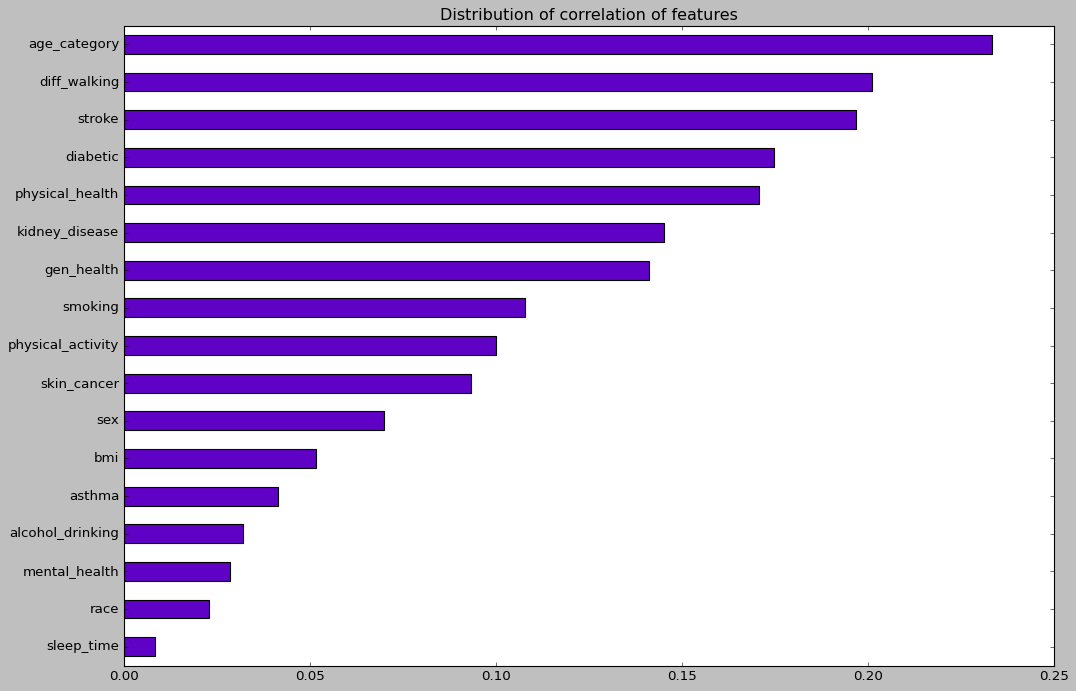

In [ ]:
plt.style.use("classic")
sns.set_palette('gnuplot')
plt.figure(figsize = (15,10))
plt.title('Distribution of correlation of features')
abs(corr['heart_disease']).sort_values()[:-1].plot.barh()
plt.show()